In [1]:
import numpy as np
import matplotlib.pyplot as plt

from models import LinearRegression
%matplotlib inline

In [2]:
plt.style.use("grayscale")
plt.style.use("seaborn-whitegrid")
gray = (150/255,150/255,150/255)

以下のシステムからデータをランダムに生成する
$$
\beta_1 \sim \mathcal{N}(0, 1) \\
\beta_2 \sim \mathcal{N}(0, 1) \\
\boldsymbol{x}_n \sim \mathcal{N}(\bf{0}, \bf{\Sigma}), 
\quad \bf{\Sigma} = 
\begin{bmatrix}
 1 & \rm{cov} \\
 \rm{cov} & 1 \\
\end{bmatrix}\\
y_n \sim \mathcal{N}(\boldsymbol{\beta}^T \boldsymbol{x}_n, 0.1)\\
$$

In [3]:
N = 1000
cov = 0.1

beta = np.random.randn(2)
X = np.random.multivariate_normal(mean=[0,0], cov=[[1,cov],[cov,1]], size=N)
y = X@beta + np.random.normal(scale=np.sqrt(0.1), size=N)

# 完全なデータによる回帰での推定バイアス（OLS）

In [4]:
def plot_hist(ax, data, title, bins=None, label=None, alpha=None, color=None):
    ax.grid(color=gray)
    ax.hist(data, bins=bins, label=label, alpha=alpha, color=color)
    ax.set_title(title)

サンプルサイズ：500


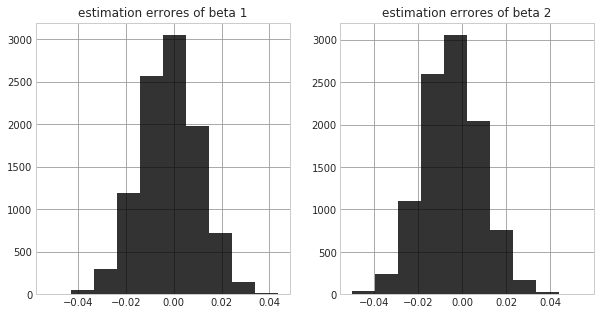

In [5]:
n_iter = 10000
rate_sample = 0.5
sample_size = int(N*rate_sample)
print("サンプルサイズ：{}".format(sample_size))

beta_comp = np.empty((n_iter, 2))

for n in range(n_iter):
    sample = np.random.choice(range(N), size=sample_size)
    model = LinearRegression(y=y[sample], Phi=X[sample])
    model.fit_OLS()
    beta_comp[n] = model.beta_OLS.flatten()
    
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
plot_hist(ax1, beta_comp[:,0]-beta[0], "estimation errores of beta 1", alpha=0.8)
ax2 = fig.add_subplot(122)
plot_hist(ax2, beta_comp[:,1]-beta[1], "estimation errores of beta 2", alpha=0.8)

plt.savefig("../draft/img/EstimationBias(unbiased_estimation).png", dpi=300)
plt.show()

# 不完全なデータによる回帰での推定バイアス（OLS）

サンプルサイズ：500


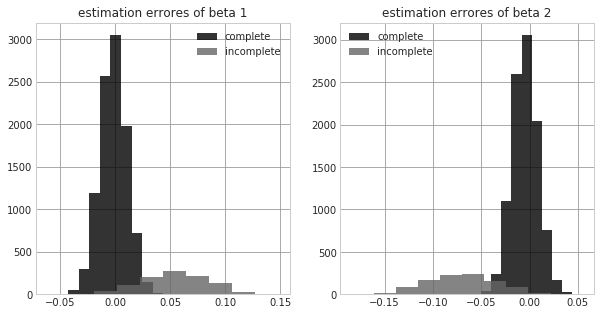

In [6]:
n_iter = 1000
rate_sample = 0.5
sample_size = int(N*rate_sample)
print("サンプルサイズ：{}".format(sample_size))

beta_incomp = np.empty((n_iter, 2))

for n in range(n_iter):
    sample = np.random.choice(range(N), size=sample_size)
    model = LinearRegression(y=y[sample], Phi=X[sample,0].reshape((-1,1)))
    model.fit_OLS()
    beta_incomp[n,0] = model.beta_OLS.flatten()
    
    model = LinearRegression(y=y[sample], Phi=X[sample,1].reshape((-1,1)))
    model.fit_OLS()
    beta_incomp[n,1] = model.beta_OLS.flatten()
    
    
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
plot_hist(ax1, beta_comp[:,0]-beta[0], "estimation errores of beta 1", label="complete", alpha=0.8)
plot_hist(ax1, beta_incomp[:,0]-beta[0], "estimation errores of beta 1", label="incomplete", alpha=0.8)
ax1.legend()
ax2 = fig.add_subplot(122)
plot_hist(ax2, beta_comp[:,1]-beta[1], "estimation errores of beta 2", label="complete", alpha=0.8)
plot_hist(ax2, beta_incomp[:,1]-beta[1], "estimation errores of beta 2", label="incomplete", alpha=0.8)
ax2.legend()

plt.savefig("../draft/img/OmittedVariableBias.png", dpi=300)
plt.show()